<a href="https://colab.research.google.com/github/BHARGAVIGHEGDE/Anomaly_detection_in_Cybersecurity/blob/main/CyberSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#what can we derive?
#1)Most targeted Destibation IP address
#2)Most Logical Ports attacked
#3)Most Frequently/common type of Attack
#4)Different time of the day,(odd,,hours,day or night)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np

from datetime import datetime,timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings



In [ ]:
df=pd.read_csv('/content/Cybersecurity_attacks.csv')

In [ ]:
df.shape


(15470, 11)

In [ ]:
df.columns


Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [ ]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


In [ ]:
df[['Start time','Last time']]=df['Time'].str.split('-',expand=True)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [ ]:
df['.'].unique()

array(['.', nan], dtype=object)

In [ ]:
df=df.drop(['.','Time'],axis=1)

In [ ]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


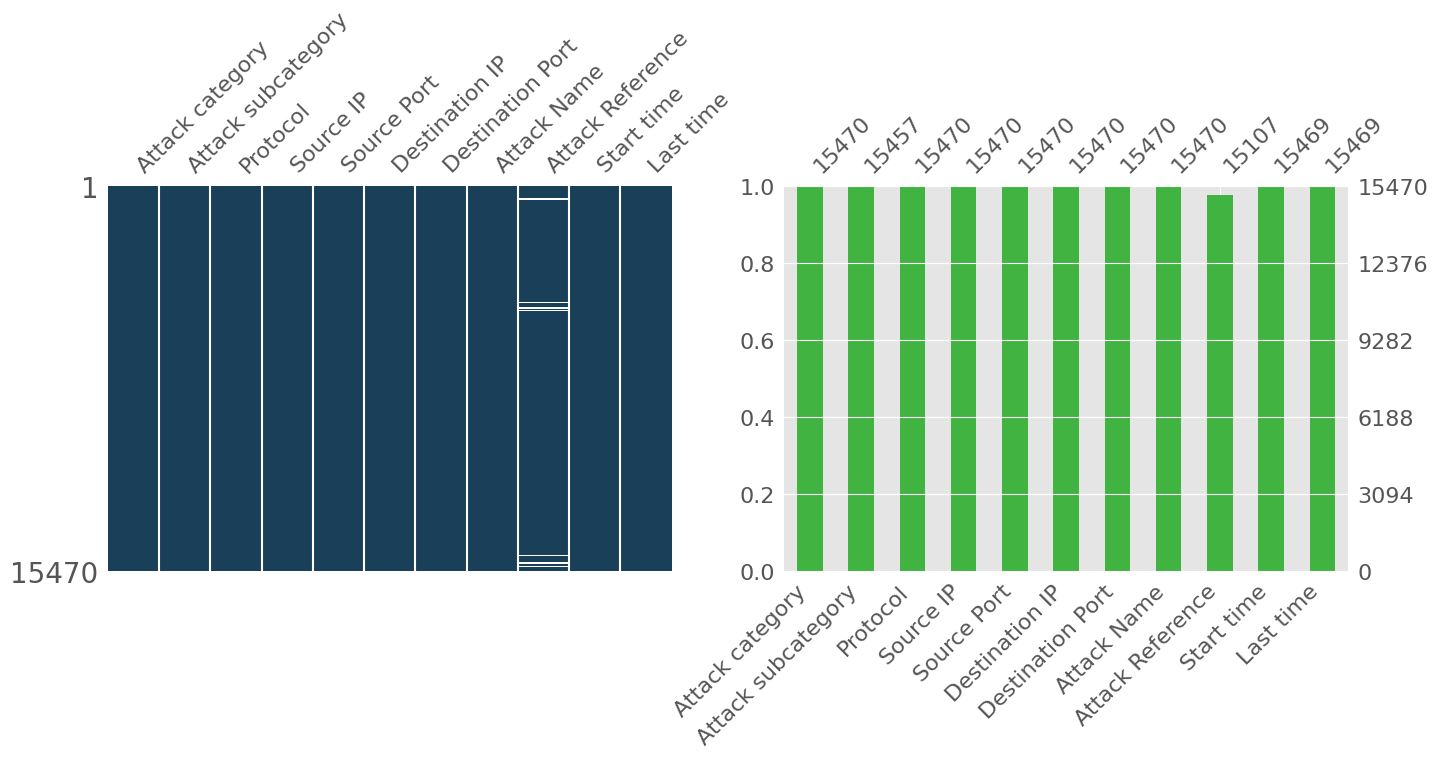

In [ ]:
figure,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
msno.matrix(df,ax=ax1,sparkline=False,color=(0.1,0.25,0.35))
msno.bar(df,ax=ax2,color=(0.25,0.7,0.25))
plt.show()

In [ ]:
df.isnull().sum()

Attack category         0
Attack subcategory     13
Protocol                0
Source IP               0
Source Port             0
Destination IP          0
Destination Port        0
Attack Name             0
Attack Reference      363
Start time              1
Last time               1
dtype: int64

In [ ]:
df["Attack subcategory"]=df["Attack subcategory"].fillna("Not registered")

In [ ]:
df.isnull().sum()

Attack category         0
Attack subcategory      0
Protocol                0
Source IP               0
Source Port             0
Destination IP          0
Destination Port        0
Attack Name             0
Attack Reference      363
Start time              1
Last time               1
dtype: int64

In [ ]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [ ]:
df[df.duplicated()].shape

(0, 11)

In [ ]:
invalid_SP=(df['Source Port']<0 | (df['Source Port']>65535))
invalid_DP=(df['Destination Port']<0 | (df['Destination Port']>65535))
df[invalid_SP | invalid_DP]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [ ]:
print(len(df['Protocol'].unique()))

131


In [ ]:
print(df['Protocol'].unique()[:15])

['tcp' 'udp' 'Tcp' 'UDP' 'ospf' 'sctp' 'sep' 'mobile' 'sun-nd' 'swipe'
 'pim' 'ggp' 'ip' 'ipnip' 'st2']


In [ ]:
print((df['Attack category'].unique()))

['Reconnaissance' 'Exploits' 'DoS' 'Generic' 'Shellcode' ' Fuzzers'
 'Worms' 'Backdoors' 'Analysis' ' Fuzzers ' ' Reconnaissance ' 'Backdoor'
 ' Shellcode ']


In [ ]:
df['Protocol']=df['Protocol'].str.upper().str.strip()
df['Attack category']=df['Attack category'].str.upper().str.strip()
df['Attack category']=df['Attack category'].str.upper().replace('BACKDOORS','BACKDOOR')



In [ ]:
tcp_port=pd.read_csv('/content/TCP-ports.csv')

In [ ]:
tcp_port.head()
tcp_port.describe()
tcp_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6326 entries, 0 to 6325
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Port         6326 non-null   int64 
 1   Service      5725 non-null   object
 2   Description  6248 non-null   object
dtypes: int64(1), object(2)
memory usage: 148.4+ KB


In [ ]:
tcp_port['Service']=tcp_port['Service'].str.upper()

In [ ]:
tcp_port.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


In [ ]:
newdf=pd.merge(df,tcp_port[['Port','Service']],left_on='Destination Port',right_on='Port',how='left')


In [ ]:
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,80.0,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,80.0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,5555.0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,80.0,HTTP


In [ ]:
newdf['Attack category'].value_counts()

EXPLOITS          5127
FUZZERS           4241
GENERIC           2573
RECONNAISSANCE    1838
DOS                901
BACKDOOR           269
ANALYSIS           261
SHELLCODE          235
WORMS               25
Name: Attack category, dtype: int64

In [ ]:
newdf['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [ ]:
newdf['Attack category'].value_counts()

EXPLOITS          5127
FUZZERS           4241
GENERIC           2573
RECONNAISSANCE    1838
DOS                901
BACKDOOR           269
ANALYSIS           261
SHELLCODE          235
WORMS               25
Name: Attack category, dtype: int64

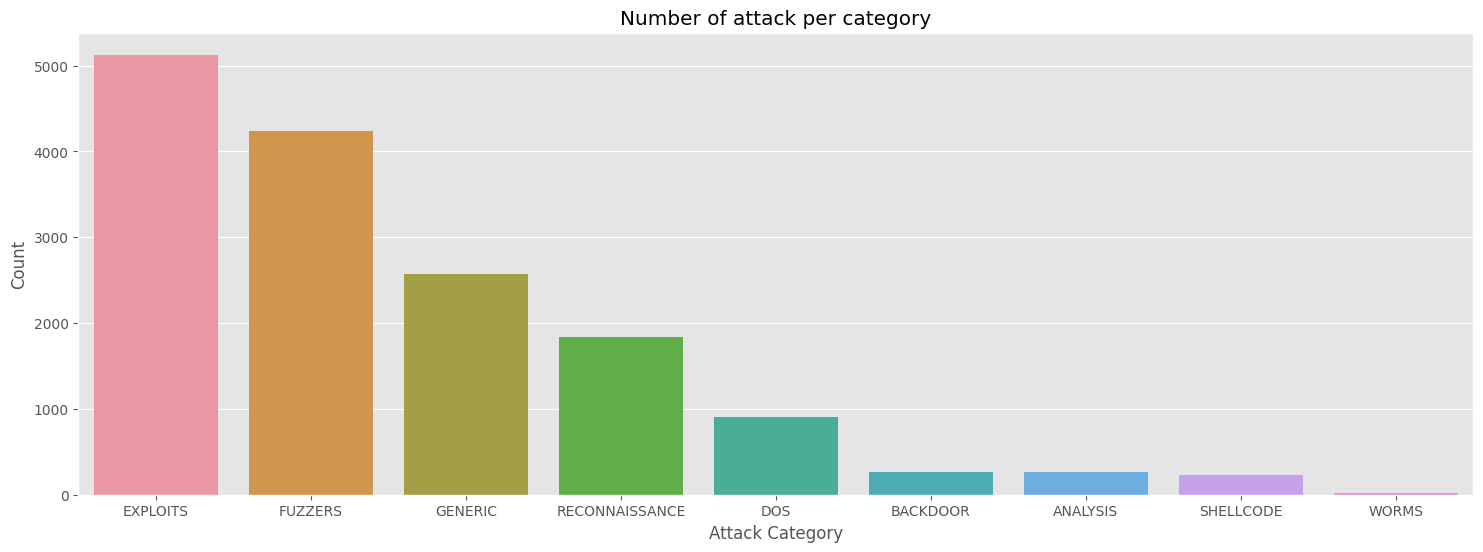

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index,y=newdf['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attack per category')
plt.show()


In [ ]:
a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]

In [ ]:
print(a)

                Attack category
EXPLOITS                   5127
FUZZERS                    4241
GENERIC                    2573
RECONNAISSANCE             1838
DOS                         901
BACKDOOR                    269


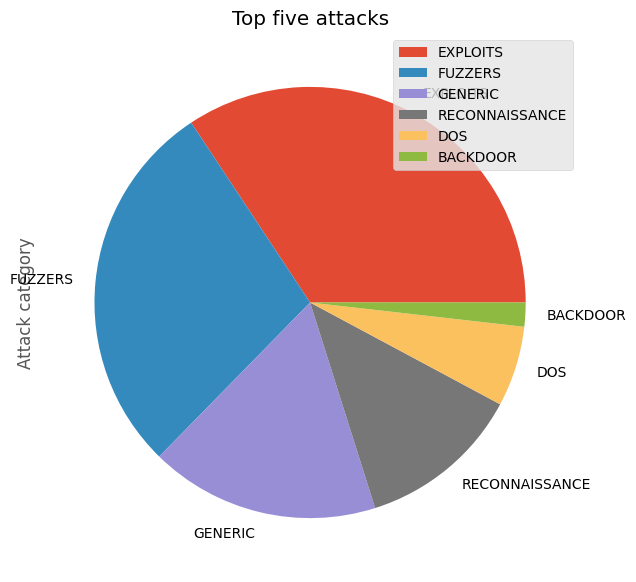

In [ ]:
a.plot(kind='pie',subplots=True,figsize=(7,7))
plt.title('Top five attacks')

plt.show()

In [ ]:
newdf['Start time']

0        1421927414
1        1421927415
2        1421927416
3        1421927417
4        1421927418
            ...    
15465    1424220148
15466    1424220148
15467    1424220148
15468    1424220148
15469           NaN
Name: Start time, Length: 15470, dtype: object

In [ ]:
newdf['Start time']=pd.to_datetime(newdf['Start time'],unit='s')
newdf['Last time']=pd.to_datetime(newdf['Last time'],unit='s')
newdf['Duration']=((newdf['Last time']-newdf['Start time']).dt.seconds)

In [ ]:
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,80.0,HTTP,2.0
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,NaN,0.0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,80.0,HTTP,0.0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,5555.0,PERSONAL-AGENT,0.0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,80.0,HTTP,0.0


In [ ]:
newdf['Start time'].astype(str).str.split('').str[0].unique()

array([''], dtype=object)

In [ ]:
newdf.describe()

,Source Port,Destination Port,Port,Duration
count,15470.000000,15470.000000,14741.000000,15469.000000
mean,28207.712476,2290.340918,352.610271,1.249919
std,22207.591498,9805.373294,1225.171964,4.785817
min,0.000000,0.000000,0.000000,0.000000
25%,4975.000000,53.000000,53.000000,0.000000
50%,27463.500000,80.000000,80.000000,0.000000
75%,47439.000000,179.000000,179.000000,1.000000
max,65535.000000,65535.000000,33060.000000,60.000000


In [ ]:
newdf.corr(method='pearson')

<ipython-input-44-1dec083219dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  newdf.corr(method='pearson')


,Source Port,Destination Port,Port,Duration
Source Port,1.000000,0.055113,0.064986,0.010301
Destination Port,0.055113,1.000000,1.000000,-0.020551
Port,0.064986,1.000000,1.000000,-0.003805
Duration,0.010301,-0.020551,-0.003805,1.000000


In [ ]:
newdf.corr(method="spearman")

<ipython-input-45-58e82facfa94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  newdf.corr(method="spearman")


,Source Port,Destination Port,Port,Duration
Source Port,1.000000,0.377988,0.392613,0.183507
Destination Port,0.377988,1.000000,1.000000,0.094211
Port,0.392613,1.000000,1.000000,0.100807
Duration,0.183507,0.094211,0.100807,1.000000


In [ ]:
df_dummies=pd.get_dummies(newdf,columns=['Attack category'])

<ipython-input-47-9353fd8ff759>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dummies.corr(method='pearson'),annot=True,vmin=1.0,cmap=sns.color_palette("RdBu_r",15))


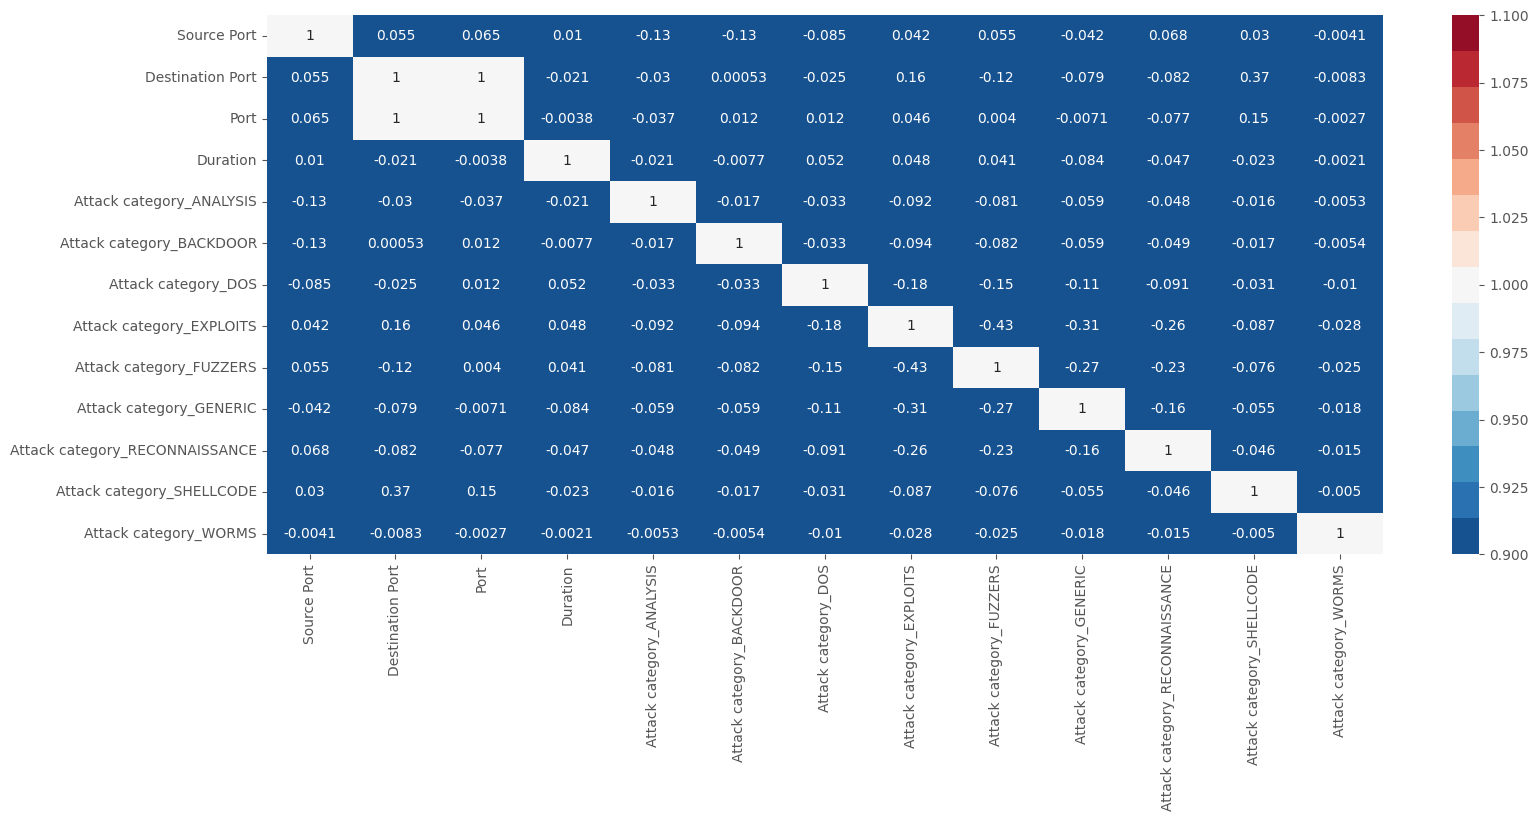

In [ ]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'),annot=True,vmin=1.0,cmap=sns.color_palette("RdBu_r",15))
plt.show()

<ipython-input-48-eee298a34969>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dummies.corr(method='spearman'),annot=True,vmin=1.0,cmap=sns.color_palette("RdBu_r",15))


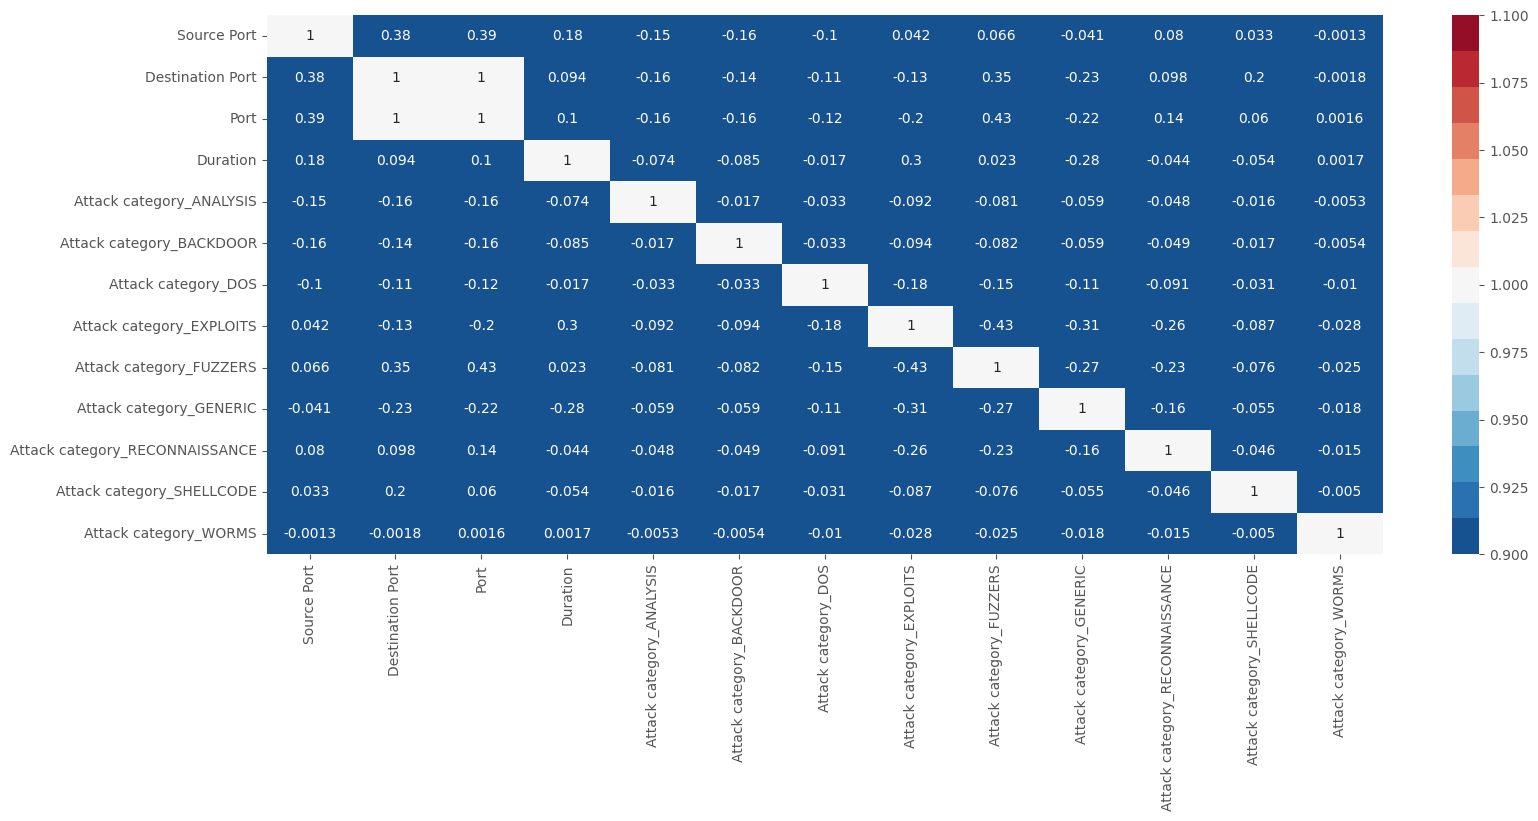

In [ ]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='spearman'),annot=True,vmin=1.0,cmap=sns.color_palette("RdBu_r",15))
plt.show()

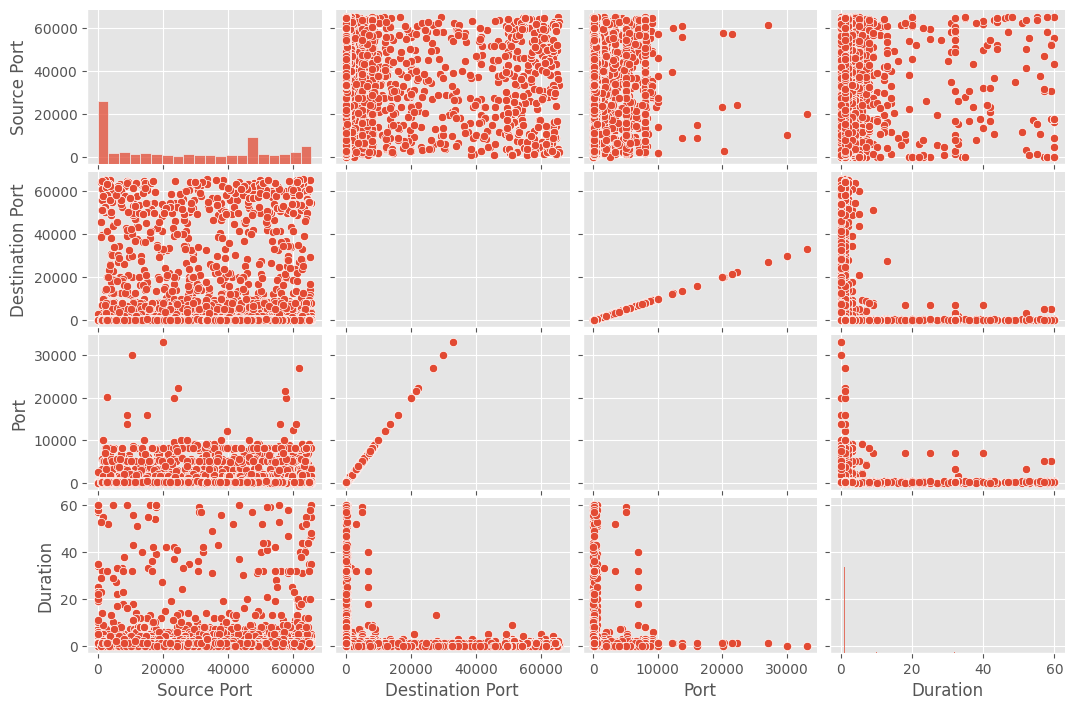

In [ ]:
g=sns.pairplot(newdf)
g.fig.set_size_inches(11,7)
plt.show()

In [ ]:
newdf['Destination IP'].value_counts()

149.171.126.18    3024
149.171.126.12    2647
149.171.126.13    1385
149.171.126.14    1383
149.171.126.11    1353
149.171.126.10    1243
149.171.126.15    1226
149.171.126.17    1195
149.171.126.19    1035
149.171.126.16     979
Name: Destination IP, dtype: int64

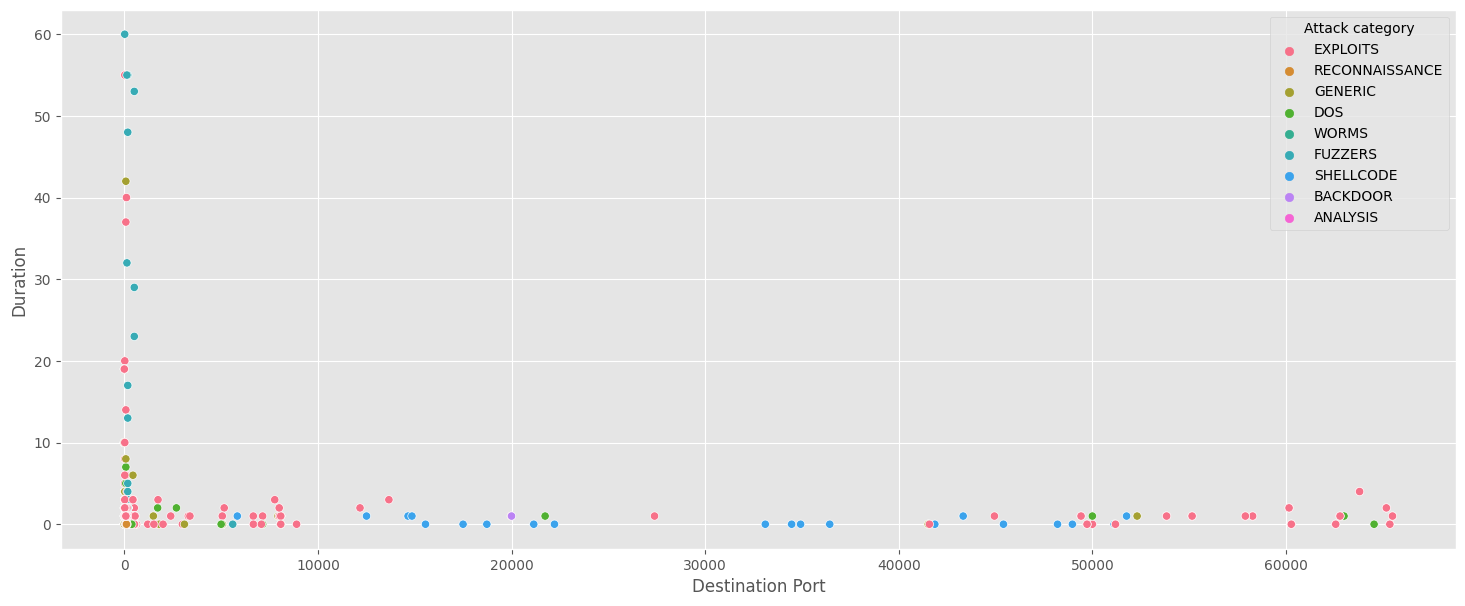

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port',y='Duration',hue='Attack category',data=newdf[newdf['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

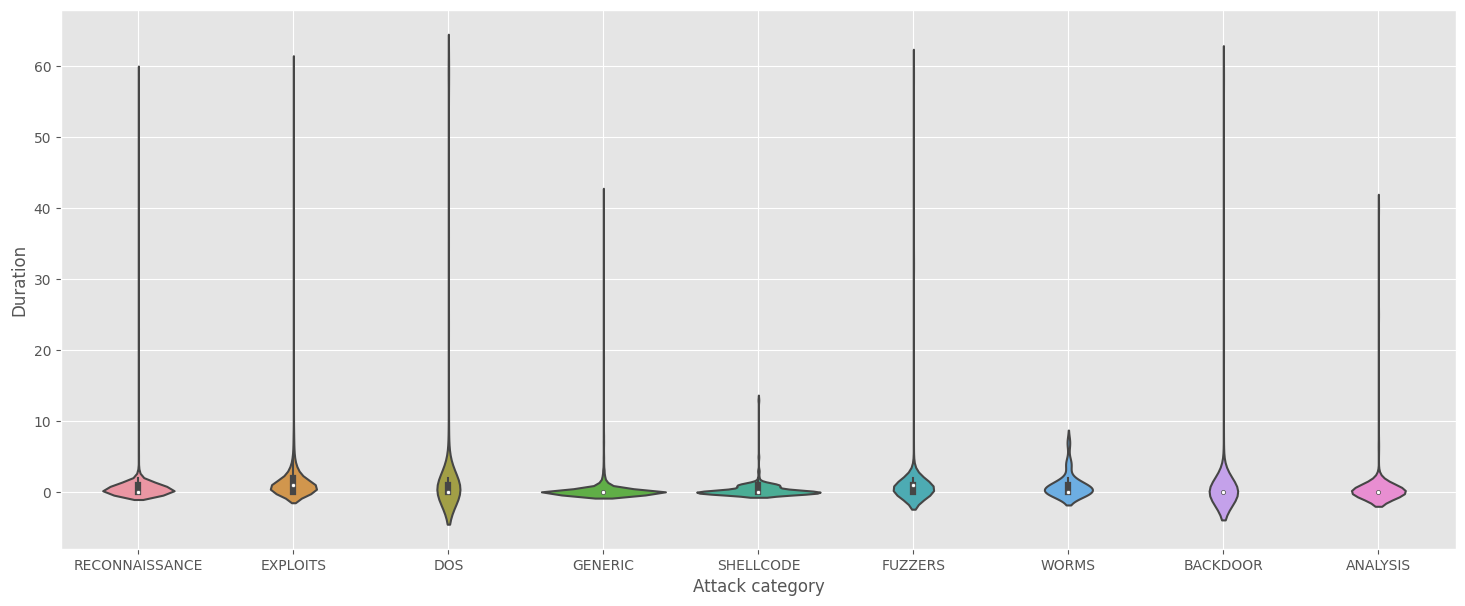

In [ ]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attack category',y='Duration',data=newdf)
plt.grid(True)
plt.show()

In [ ]:
def heatmap_graph(df,xlabel,ylabel,title):
  plt.figure(figsize=(18,8))
  ax=sns.heatmap(df)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.show()

In [ ]:
newdf["Start time"][1].hour

11

In [ ]:
df_pivot=newdf.copy()
df_pivot['hour']=df_pivot.apply(lambda row:'0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00',axis=1)

In [ ]:
df_pivot[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Port,Service,Duration,hour
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,80.0,HTTP,2.0,11:00:00
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,NaN,0.0,11:00:00
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,80.0,HTTP,0.0,11:00:00
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,5555.0,PERSONAL-AGENT,0.0,11:00:00
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,80.0,HTTP,0.0,11:00:00


In [ ]:
df_p1=pd.pivot_table(df_pivot,values='Attack Name',index=['hour'],columns=['Attack category'],aggfunc='count')
df_p1

Attack category,ANALYSIS,BACKDOOR,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
hour,,,,,,,,,
00:00:00,3.0,13.0,93.0,340.0,106.0,31.0,94.0,12.0,1.0
11:00:00,NaN,NaN,48.0,366.0,495.0,43.0,140.0,20.0,3.0
12:00:00,199.0,230.0,532.0,2714.0,2324.0,894.0,882.0,115.0,15.0
13:00:00,59.0,26.0,228.0,1706.0,1316.0,1605.0,722.0,88.0,6.0
nan:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


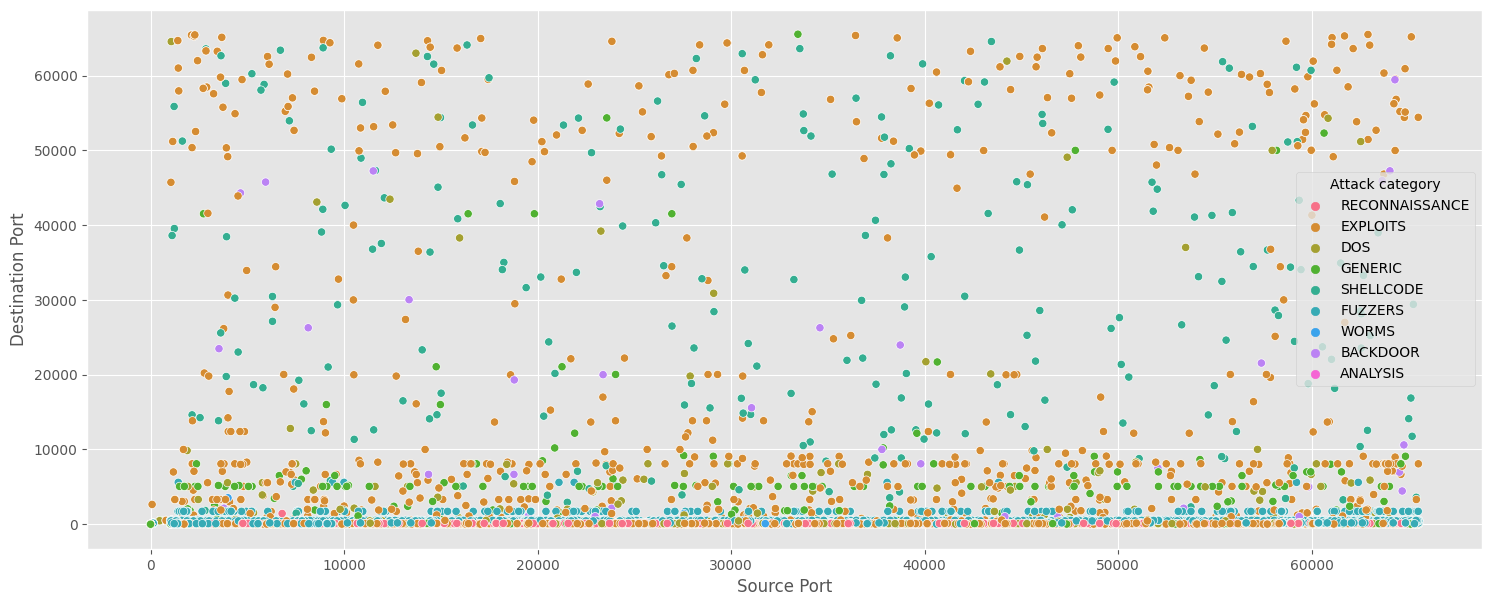

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port',y='Destination Port',hue='Attack category',data=newdf)
plt.show()

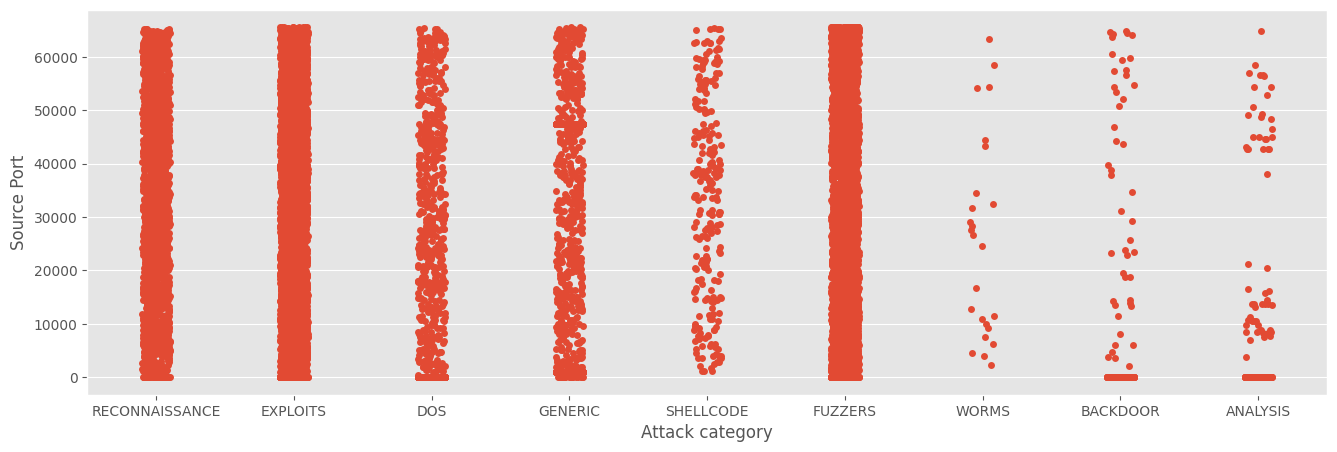

In [ ]:
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Source Port',data=newdf)
plt.show()

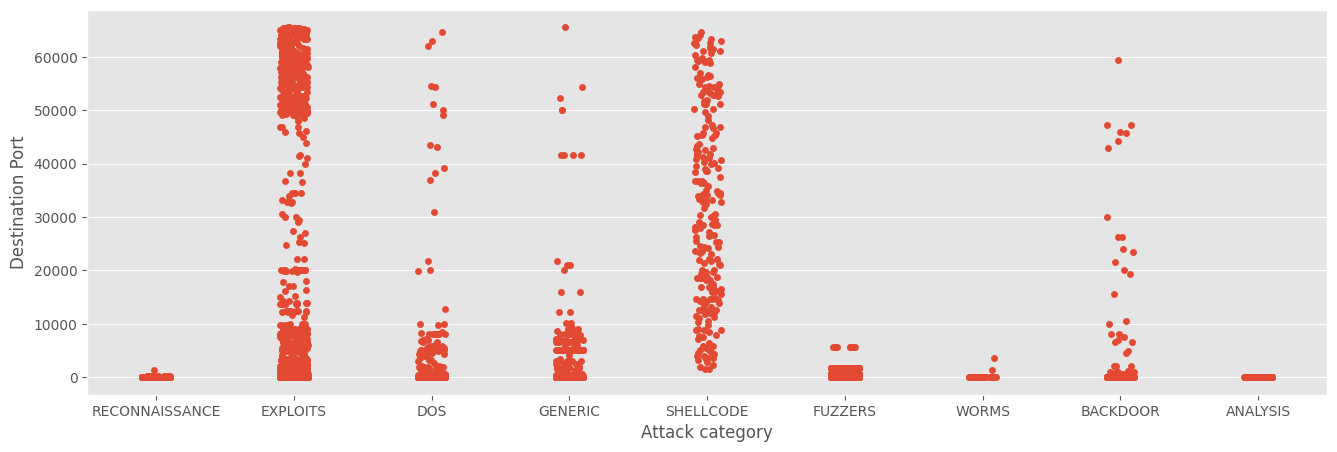

In [ ]:
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Destination Port',data=newdf)
plt.show()

In [ ]:
list(newdf['Source IP'].unique())

['175.45.176.0', '175.45.176.3', '175.45.176.2', '175.45.176.1']

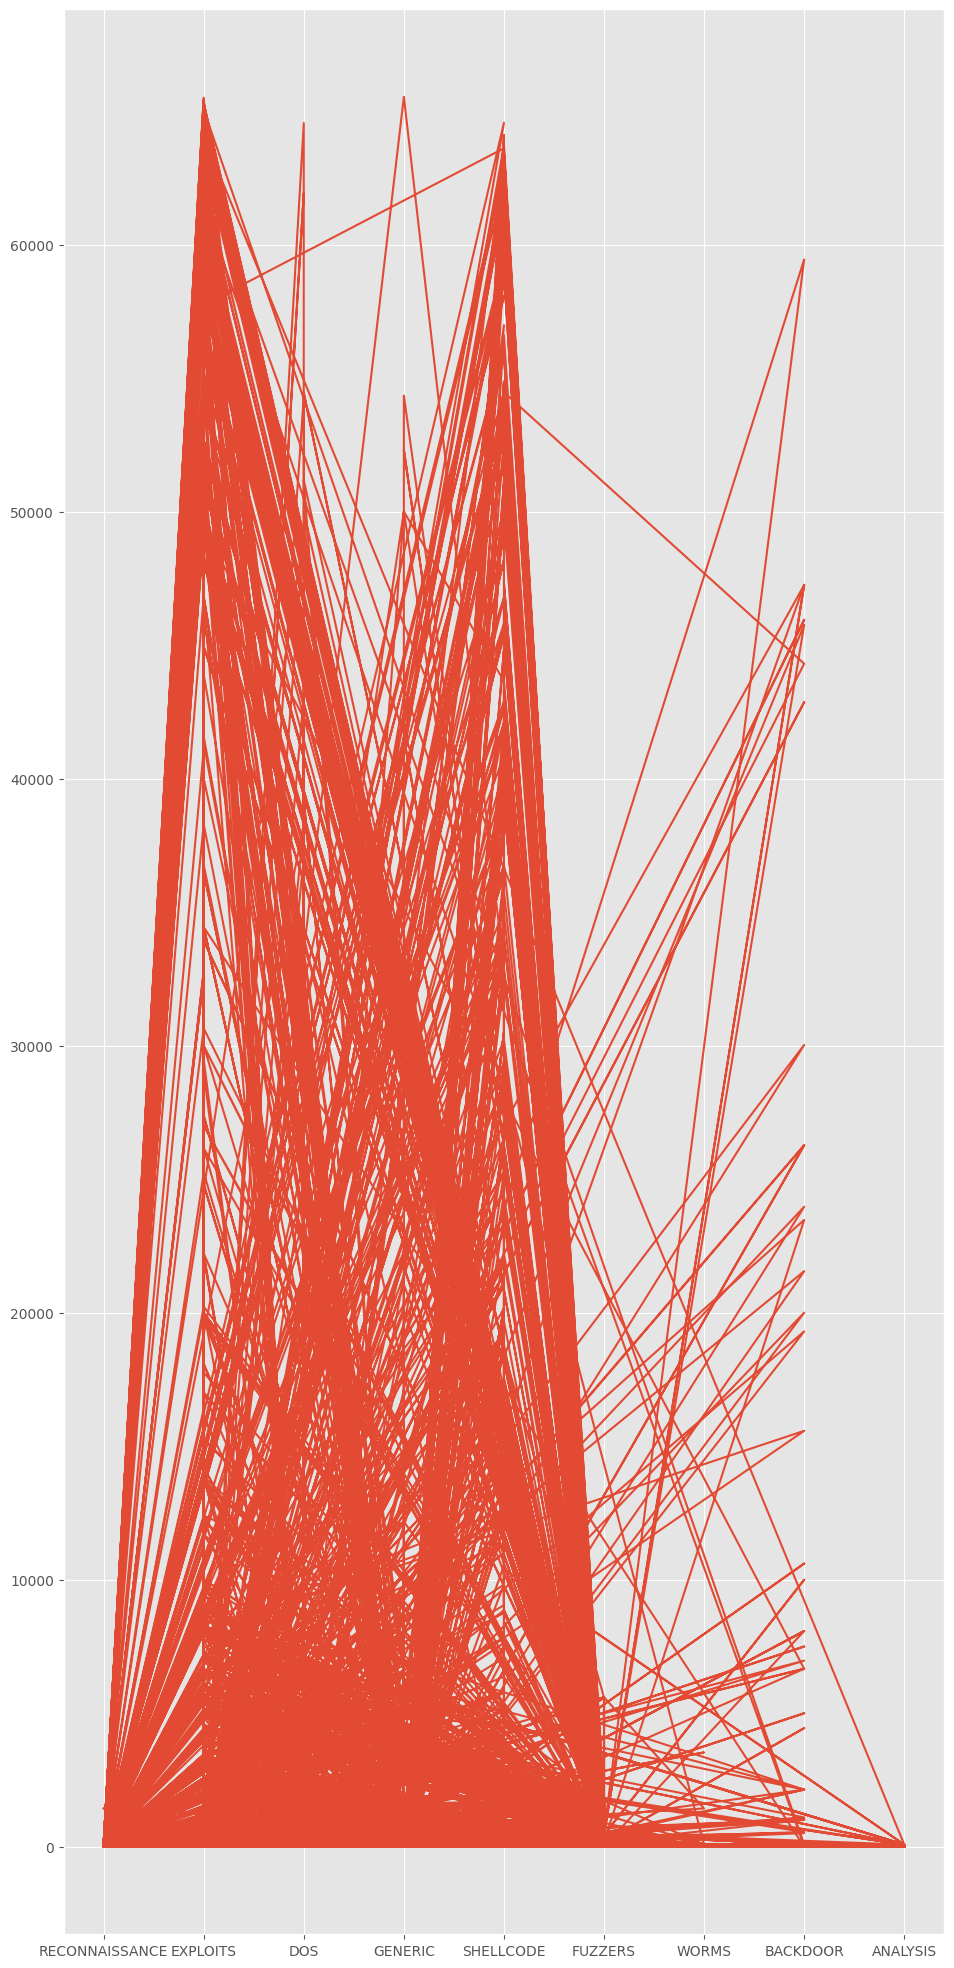

In [ ]:

x=newdf['Attack category']
y=newdf['Destination Port']


f = plt.figure(figsize=(25,25))
ax = f.add_subplot(121)


ax.plot(x,y)
plt.show()


